In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def loadfile(fn):
    """Load plasma torch spectrum from file
    
    Returns pandas dataframe with two columns. When loading, it
    checks to validate that average counts ("Intensity") is above 100.
    It also checks that all channels above 1000nm are less than 100.
    If either of these checks fails, it raises an error instead of
    loading the data. It also sets all channels with negative counts
    to zero.
    """
    d = pd.read_table(
        fn,
        sep='\s+',
        skiprows=15,
        skipfooter=240,
        engine='python',
        header=None,
        names=['Wavelength', 'Intensity']
    )
    d[d<0] = 0
    
    # Verify the mean is above 100
    mn = np.mean(d['Intensity'])
    if mn < 100:
        raise Exception('Average intensity is too low ({} < 100)'.format(np.mean(d['Intensity'])))
    
    # Verify that channels above 1000nm are < 100
    high_wavelength_values = d[d['Wavelength'] > 1000]
    mx = np.max(high_wavelength_values['Intensity'])
    if mx > 100:
        raise Exception('High-wavelength intensity too high ({} > 100)'.format(mx))
    
    # Normalize the intensity
    d['Intensity'] = d['Intensity'] / sum(d['Intensity'])
    
    return d

In [34]:
d = loadfile('Data/20170721-Ar-H-Torch.txt')

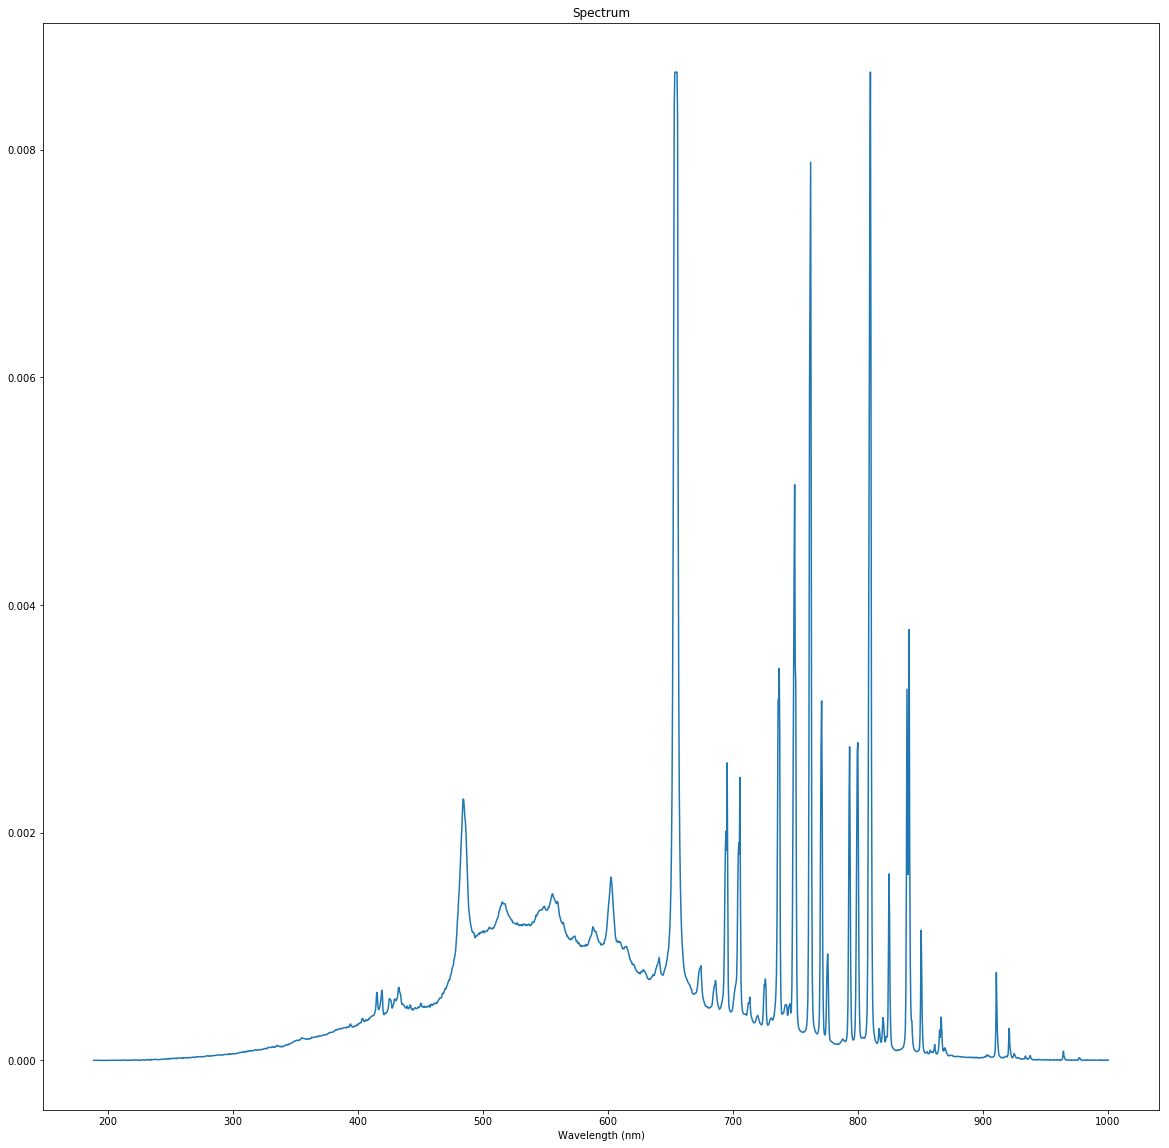

In [27]:
f = plt.figure(1, figsize=(20,20))
p = plt.subplot(111)
p.plot(d['Wavelength'], d['Intensity'])
fig_size = [0, 0]
fig_size[0] = 12
fig_size[1] = 9
plt.title("Spectrum")
plt.xlabel('Wavelength (nm)')
plt.show()

In [6]:
bd1 = loadfile("Data/Bad/20170906_ORNL-Torch-Sil_Subt14_14-31-55-813.txt")

Exception: High-wavelength intensity too high (766.31 > 100)

In [7]:
bd2 = loadfile('Data/Bad/20170906_ORNL-Torch-Sil_Subt14_14-33-16-145.txt')

Exception: Average intensity is too low (6.387202906071614 < 100)

In [8]:
d

,Wavelength,Intensity
0,188.309,5.029640e-08
1,188.782,5.029640e-08
2,189.255,5.253180e-07
3,189.728,9.444546e-07
4,190.201,1.900086e-07
5,190.674,1.531246e-06
6,191.147,7.768000e-07
7,191.619,0.000000e+00
8,192.092,3.297208e-07
9,192.565,0.000000e+00


In [11]:
import peakutils as pk

In [25]:
indexes = pk.indexes(d['Intensity'], thres=0.0005, min_dist=0.1)
print(indexes)
print(len(indexes))
print(d['Wavelength'][indexes], d['Intensity'][indexes])

[  71   85   90   92   94   97   99  104  108  113  117  119  121  124  128
  130  134  138  140  144  147  149  151  153  155  158  160  163  168  170
  173  175  178  181  183  186  193  197  199  201  206  212  214  218  223
  226  229  231  233  236  238  241  247  250  252  254  257  259  262  266
  269  271  276  279  282  286  292  294  299  301  305  308  313  319  321
  324  329  332  344  347  351  356  360  367  372  377  379  381  384  387
  389  392  395  403  406  415  419  422  428  430  433  436  440  444  446
  450  457  460  467  471  478  486  494  499  501  507  517  524  530  538
  541  544  547  552  557  562  568  573  577  580  585  589  596  600  605
  611  636  654  659  664  667  671  674  679  682  686  688  705  707  724
  731  733  736  738  742  744  746  748  751  755  758  764  772  777  779
  786  793  802  812  820  823  827  829  833  837  840  844  846  850  852
  865  870  880  897  908  911  914  919  925  936  938  946  948  951  955
  966  972  

In [24]:
peaks_x = pk.interpolate(d.as_matrix(columns=d.columns), d.as_matrix(columns=d.columns), ind=indexes)
print(peaks_x)

TypeError: Index(...) must be called with a collection of some kind, 'Wavelength' was passed

In [35]:
d[d.Wavelength > 500]

,Wavelength,Intensity
672,500.442,1.134793e-03
673,500.898,1.121213e-03
674,501.354,1.134178e-03
675,501.809,1.133759e-03
676,502.265,1.131691e-03
677,502.721,1.133815e-03
678,503.177,1.134402e-03
679,503.632,1.148401e-03
680,504.088,1.147199e-03
681,504.543,1.159466e-03
